In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#bro this will load ur dataset okki
df = pd.read_csv("SLU Opportunity Wise Data-1710158595043 - SLU Opportunity Wise Data-1710158595043.csv")

In [ ]:
#bro this will convert date/time columns to datetime objects okki.

df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'], errors='coerce', infer_datetime_format=True)
df['Opportunity End Date'] = pd.to_datetime(df['Opportunity End Date'], errors='coerce', infer_datetime_format=True)
df['Apply Date'] = pd.to_datetime(df['Apply Date'], errors='coerce', infer_datetime_format=True)
df['Opportunity Start Date'] = pd.to_datetime(df['Opportunity Start Date'], errors='coerce', infer_datetime_format=True)

C:\Users\leewa\AppData\Local\Temp\ipykernel_26532\999420941.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'], errors='coerce', infer_datetime_format=True)
C:\Users\leewa\AppData\Local\Temp\ipykernel_26532\999420941.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Opportunity End Date'] = pd.to_datetime(df['Opportunity End Date'], errors='coerce', infer_datetime_format=True)
C:\Users\leewa\AppData\Local\Temp\ipykernel_26532\999420941.py:3: UserWarning: The argument 'infer

In [ ]:
#this is for extracting month and year 
df['SignUp Month'] = df['Learner SignUp DateTime'].dt.month
df['SignUp Year'] = df['Learner SignUp DateTime'].dt.year

In [ ]:
# bro thiis will create a table for monthly sign-ups
monthly_signups = df.groupby(['SignUp Year', 'SignUp Month']).size().reset_index(name='Sign-ups')

In [ ]:
#bro this will rename columns to improve visvulization.

monthly_signups.rename(columns = {'SignUp Year' : 'Year',
                                   'SignUp Month': 'Month'}, inplace = True)

In [ ]:
#to sort by year then months

monthly_signups.sort_values(['Year','Month'],inplace=True)
#to print monthly signup data.
print(monthly_signups)

      Year  Month  Sign-ups
0   2023.0    1.0       229
1   2023.0    2.0        86
2   2023.0    3.0       183
3   2023.0    4.0       278
4   2023.0    5.0       400
5   2023.0    6.0       743
6   2023.0    7.0       696
7   2023.0    8.0      1110
8   2023.0    9.0       649
9   2023.0   10.0       407
10  2023.0   11.0       201
11  2023.0   12.0       642
12  2024.0    1.0      1509
13  2024.0    2.0      1007
14  2024.0    3.0       123


In [10]:
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

c:\Users\leewa\anaconda3\a cute anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\leewa\anaconda3\a cute anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


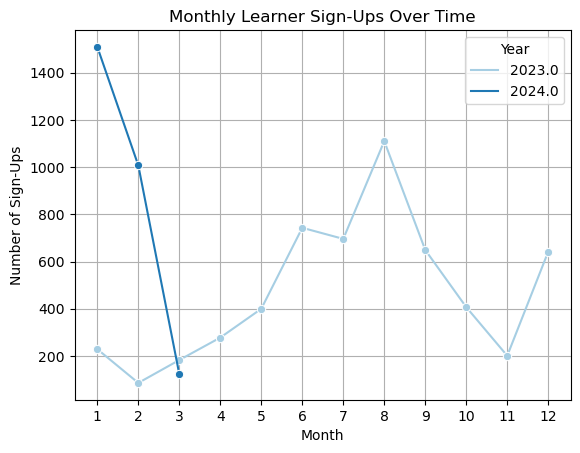

In [ ]:

#visvulization of monthly signups
sns.lineplot(x='Month', y='Sign-ups', hue='Year', data=monthly_signups, marker='o', palette = 'Paired') #Added marker and increased linewdith to aid interpretation
plt.title('Monthly Learner Sign-Ups Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Sign-Ups')
plt.xticks(range(1, 13))  
plt.legend(title='Year')
plt.grid(True) 
plt.show()

In [ ]:
#for seasonality analysis
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

In [13]:
df['Season'] = df['SignUp Month'].apply(get_season)
seasonal_signups = df.groupby(['SignUp Year', 'Season']).size().reset_index(name='Sign-ups')

     Year  Season  Sign-ups
0  2023.0    Fall      1257
1  2023.0  Spring       861
2  2023.0  Summer      2549
3  2023.0  Winter       957
4  2024.0  Spring       123
5  2024.0  Winter      2516


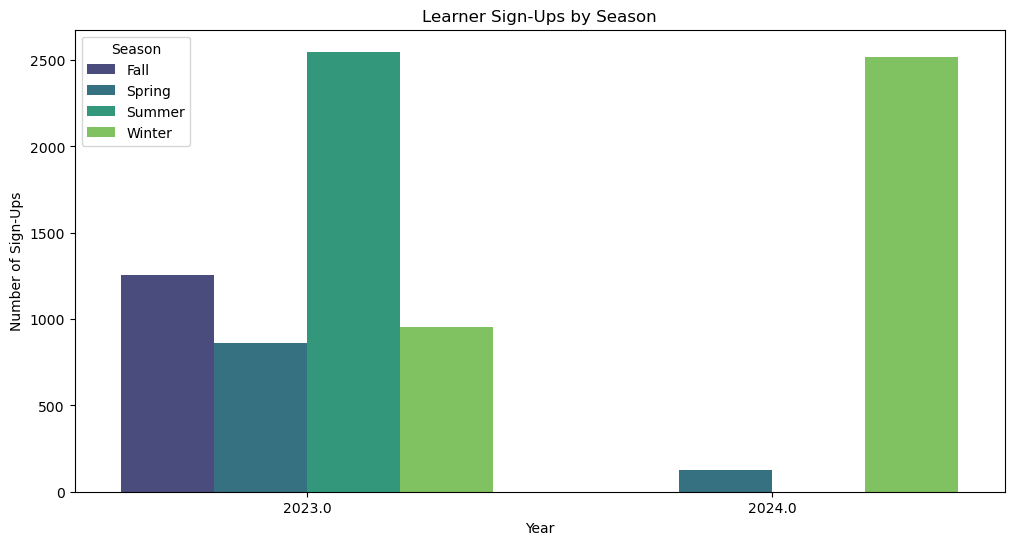

In [15]:
#this will rename coulums to reflect dataframes 
seasonal_signups.rename(columns = {'SignUp Year': 'Year'}, inplace= True)

#for printing new dataframe okki bro 
print(seasonal_signups)

plt.figure(figsize=(12, 6)) 
sns.barplot(x='Year', y='Sign-ups', hue='Season', data=seasonal_signups, palette='viridis')
plt.title('Learner Sign-Ups by Season')
plt.xlabel('Year')
plt.ylabel('Number of Sign-Ups')
plt.legend(title = "Season")
plt.show()

In [16]:
df['Duration'] = (df['Opportunity End Date'] - df['Opportunity Start Date']).dt.days

In [ ]:
# Corelation Heatmap

correlation_df = df[['Duration','SignUp Month','Status Code']]

In [ ]:

correlation_df = correlation_df.dropna()

for col in ['Duration', 'SignUp Month', 'Status Code']:
    correlation_df[col] = pd.to_numeric(correlation_df[col], errors = 'coerce')

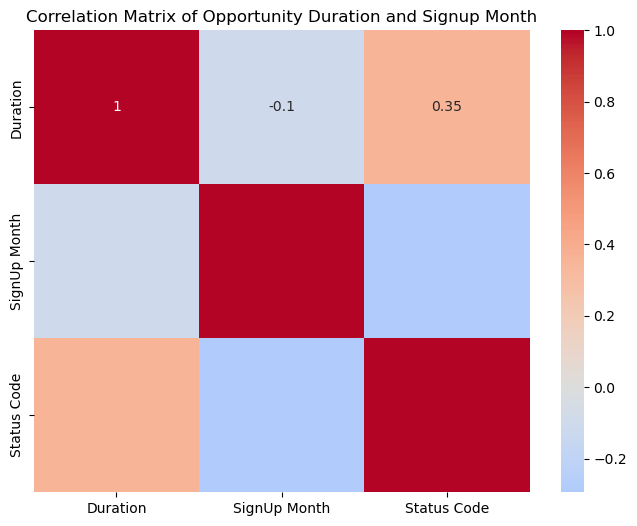

In [ ]:
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center = 0) 
plt.title('Correlation Matrix of Opportunity Duration and Signup Month')
plt.show()